In [54]:
import numpy as np            #importing all the required libraries
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [55]:
import pandas as pd          #read the amazon reviews dataset of samsung galaxy M31s smartphone
amazon=pd.read_csv("Amazon.csv",error_bad_lines=False)

In [56]:
amazon

,asin,product_title,average_rating,review_author,reviewed_product_attribute,review_rating,review_date,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url
0,B07DJCJBB3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",4.3,Raman Kumar,Colour: Mirage Black | Style name: 6GB RAM,4.0,"August 12, 2020",India,I am facing two problems 1. Fingerprint Sensor...,NaN,Good Phone,4,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/product-reviews/B07DJCJB...,Samsung,https://www.amazon.in/gp/customer-reviews/R2CI...
1,B07DJCJBB3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",4.3,sumon,Colour: Mirage Black | Style name: 6GB RAM,3.0,"August 20, 2020",India,The video stability needs a lot of improvement...,NaN,3.5/5 Just Camera Improvements needed,2,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/product-reviews/B07DJCJB...,Samsung,https://www.amazon.in/gp/customer-reviews/R1PC...
2,B07DJCJBB3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",4.3,Deepak,Colour: Mirage Blue | Style name: 6GB RAM,5.0,"August 10, 2020",India,good product under budget. Got it for 18K in A...,NaN,VALUE FOR MONEY,43,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/product-reviews/B07DJCJB...,Samsung,https://www.amazon.in/gp/customer-reviews/R1N1...
3,B07DJCJBB3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",4.3,Vijoy K.,Colour: Mirage Black | Style name: 6GB RAM,5.0,"August 16, 2020",India,"The mobile was delivered on Aug 12, much befor...",NaN,Wonderful,5,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/product-reviews/B07DJCJB...,Samsung,https://www.amazon.in/gp/customer-reviews/R1HN...
4,B07DJCJBB3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",4.3,Venessa,Colour: Mirage Blue | Style name: 6GB RAM,4.0,"August 17, 2020",India,1. Fingerprint reader is very fast. 2. Face un...,NaN,Overall a good phone.,2,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/product-reviews/B07DJCJB...,Samsung,https://www.amazon.in/gp/customer-reviews/R3CG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,B07DJCJBB3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",4.3,Varshini prasanna,Colour: Mirage Blue | Style name: 6GB RAM,5.0,"August 13, 2020",India,Reviewing this after 48 hours of arrival..So f...,NaN,Worth Buying,2,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/product-reviews/B07DJCJB...,Samsung,https://www.amazon.in/gp/customer-reviews/RF7N...
246,B07DJCJBB3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",4.3,Sumit,Colour: Mirage Blue | Style name: 6GB RAM,1.0,"August 29, 2020",India,Worst mobile ever phone is heating too much I ...,NaN,Worst mobile,22,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/product-reviews/B07DJCJB...,Samsung,https://www.amazon.in/gp/customer-reviews/R31W...
247,B07DJCJBB3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",4.3,Manoj U.,Colour: Mirage Blue | Style name: 6GB RAM,5.0,"August 20, 2020",India,"I haven't words for M31S, GREAT, I didn't like...",NaN,Good,23,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/product-reviews/B07DJCJB...,Samsung,https://www.amazon.in/gp/customer-reviews/R3T5...
248,B07DJCJBB3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",4.3,PARIJAT FOUZDAR,Colour: Mirage Blue | Style name: 6GB RAM,5.0,"September 26, 2020",India,This is perfect for day to day usage with fant...,NaN,Fantastic experience with my first samsung phone.,1,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/product-reviews/B07DJCJB...,Samsung,https://www.amazon.in/gp/customer-reviews/R309...


In [57]:
amazon.drop(['asin'],inplace=True,axis=1)                #drop the columns which is not necessary to perform the nlp
amazon.drop(['product_title'],inplace=True,axis=1)
amazon.drop(['average_rating'],inplace=True,axis=1)
amazon.drop(['review_author'],inplace=True,axis=1)
amazon.drop(['reviewed_product_attribute'],inplace=True,axis=1)
amazon.drop(['review_rating'],inplace=True,axis=1)
amazon.drop(['review_date'],inplace=True,axis=1)
amazon.drop(['reviewed_country'],inplace=True,axis=1)
amazon.drop(['review_comment_count'],inplace=True,axis=1)
amazon.drop(['review_header'],inplace=True,axis=1)
amazon.drop(['no_of_people_reacted_helpful'],inplace=True,axis=1)
amazon.drop(['author_profile_url'],inplace=True,axis=1)
amazon.drop(['url'],inplace=True,axis=1)
amazon.drop(['brand'],inplace=True,axis=1)
amazon.drop(['review_url'],inplace=True,axis=1)

In [58]:
amazon

,review_text
0,I am facing two problems 1. Fingerprint Sensor...
1,The video stability needs a lot of improvement...
2,good product under budget. Got it for 18K in A...
3,"The mobile was delivered on Aug 12, much befor..."
4,1. Fingerprint reader is very fast. 2. Face un...
...,...
245,Reviewing this after 48 hours of arrival..So f...
246,Worst mobile ever phone is heating too much I ...
247,"I haven't words for M31S, GREAT, I didn't like..."
248,This is perfect for day to day usage with fant...


In [59]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-02-12 10:19:45.940199: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-02-12 10:19:45.940235: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [60]:
amazon=[review_text.strip() for review_text in amazon.review_text]  # remove both the leading and the trailing characters
amazon=[review_text for review_text in amazon if review_text]  # removes empty strings, because they are considered in Python as False
amazon[0:50]

['I am facing two problems 1. Fingerprint Sensor not so good as my previous A6 Plus. 2. Front Camara is shaking. Apart from this Amazon packaging is very very simple & bad.',
 'The video stability needs a lot of improvement l, in this price segment these things should be more refined. Also, photos in low inditect sun light or artificial lights needs improvement as it has noise in the images. I think this is just a image processing thing which can be imlroved with the updates. Else I simply love ghe phone. Being a Samsung member for the past 10 years its been a nice experience.',
 "good product under budget. Got it for 18K in Amazon sale. Phone is not heavy weight though it has big battery. Excellent display with L1 support. Super fast charger. Good cameras Side finger print sensor is very good. Stylish gradient design. Few things I personally didn't like: Build quality - seems very fragile. Too much of pre installed software by Samsung. No back cover included in the box. Phone looks ve

In [61]:
nlp=spacy.load('en_core_web_sm')   #parts of speech tagging


In [62]:
one_block=amazon[120]       #selecting review of choice to visualize using spacy
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [63]:
one_block

'Facial recognition is not working itself and Its says 64MB camera but its only in writings not in performance.6000 MAH battery but it will drain in 8hrs (Not even Continues) if you watch basic youtube and normal FB browsing. I will not recommend this mobile if anyone wish to by only for Camera and battery'

In [64]:
for token in doc_block[0:50]:    #tokenization of selected tweet to know parts of speech 
    print(token,token.pos_)

Facial ADJ
recognition NOUN
is AUX
not PART
working VERB
itself PRON
and CCONJ
Its PRON
says VERB
64 NUM
MB NOUN
camera NOUN
but CCONJ
its PRON
only ADJ
in ADP
writings NOUN
not PART
in ADP
performance.6000 NUM
MAH PROPN
battery NOUN
but CCONJ
it PRON
will AUX
drain VERB
in ADP
8hrs PROPN
( PUNCT
Not PART
even ADV
Continues VERB
) PUNCT
if SCONJ
you PRON
watch VERB
basic ADJ
youtube NOUN
and CCONJ
normal ADJ
FB NOUN
browsing NOUN
. PUNCT
I PRON
will AUX
not PART
recommend VERB
this DET
mobile NOUN
if SCONJ


In [65]:
noun_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(noun_verbs[0:50])   #extraction of noun and verbs in selected review

['recognition', 'working', 'says', 'MB', 'camera', 'writings', 'battery', 'drain', 'Continues', 'watch', 'youtube', 'FB', 'browsing', 'recommend', 'mobile', 'wish', 'battery']


In [66]:
from sklearn.feature_extraction.text import CountVectorizer       #counting of tokens i.e words
cv=CountVectorizer()                                             

text=cv.fit_transform(noun_verbs)
sum_words=text.sum(axis=0)
words_freq=[(word,sum_words[0,idx])for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=["word","count"]

wf_df[0:40]



,word,count
0,battery,2
1,recognition,1
2,working,1
3,says,1
4,mb,1
5,camera,1
6,writings,1
7,drain,1
8,continues,1
9,watch,1


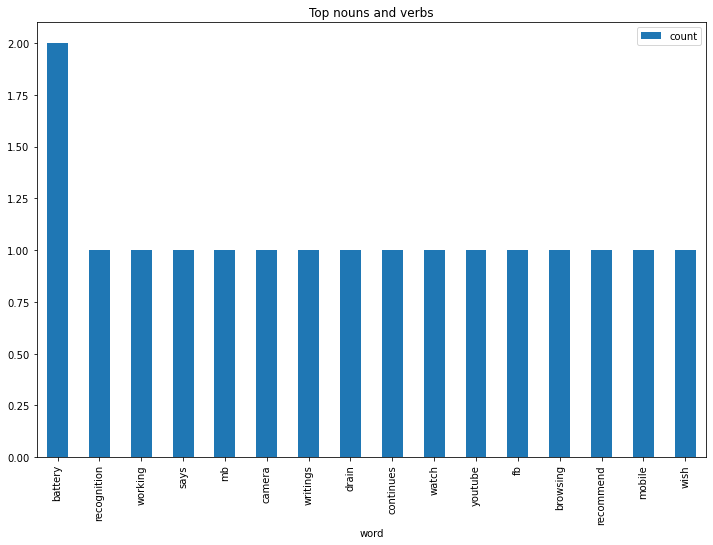

In [67]:
wf_df[0:30].plot.bar(x='word', figsize=(12,8) ,title='Top nouns and verbs')  #visualization of nouns and verbs in selected review

In [68]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')   #read affin dataset for sentiment analysis
affin.shape

(2477, 2)

In [69]:
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [70]:
affin.tail()

,word,value
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2
2476,zealous,2


In [71]:
from nltk import tokenize                           #tokenization of all the reviews
sentences=tokenize.sent_tokenize(" ".join(amazon))
sentences[50:100]

['6.',
 'A phone cover should have been provided with the amount taken.',
 'Plus its a little slippery so a phone cover is a must.',
 "Overall it's a good phone but these are a few pros and cons when buying the phone.",
 'Lets talk about the positives first: Design & Build - Compelling for this Price range.',
 'Fingerprint Magnet - Alert Display - Damn, This is the best.',
 'Software Experience - This is not a clean UI but I like this feature that Samsung almost took customization to the next level.',
 "Camera - Decent, Sony sensors does its job and Samsung's camera features is like a cherry on top.",
 'Multimedia Experience - This is what the phone is good at.',
 'Believe me it wont disappoint you either.',
 'Battery - Humongous.',
 'and Fast Charger is in the box.',
 'No need to worry about the battery backup.',
 'Cons:- Not major but noticeable.',
 'Weight :- You ll definitely feel it when used for a long period of time.',
 'Performance - This is not so good as the competition provi

In [72]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I am facing two problems 1.
1,Fingerprint Sensor not so good as my previous ...
2,2.
3,Front Camara is shaking.
4,Apart from this Amazon packaging is very very ...
...,...
2460,On the other hand it went from 100 to 96% In 2...
2461,5.
2462,Processor is fast.
2463,It can handle many apps at a time.


In [73]:
affinity_scores=affin.set_index('word')['value'].to_dict()

In [74]:
nlp=spacy.load("en_core_web_sm")   #Custom function :score each word in a sentence in lemmatised form, 
sentiment_lexicon=affinity_scores    #but calculate the score for the whole original sentence.


def calculate_sentiment(text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
            return sent_score

In [75]:
calculate_sentiment(text="good")  #testing of custom function to know whether it works or not

3

In [76]:
sent_df['sentimental_value']=sent_df['sentence'].apply(calculate_sentiment)

In [77]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)  #to know the length of words in reviews
sent_df['word_count'].head(10)

0     6
1    10
2     1
3     4
4    11
5    19
6    19
7    16
8     6
9    14
Name: word_count, dtype: int64

In [78]:
sent_df

,sentence,sentimental_value,word_count
0,I am facing two problems 1.,0,6
1,Fingerprint Sensor not so good as my previous ...,0,10
2,2.,0,1
3,Front Camara is shaking.,0,4
4,Apart from this Amazon packaging is very very ...,0,11
...,...,...,...
2460,On the other hand it went from 100 to 96% In 2...,0,34
2461,5.,0,1
2462,Processor is fast.,0,3
2463,It can handle many apps at a time.,0,8


In [79]:
sent_df.tail()

,sentence,sentimental_value,word_count
2460,On the other hand it went from 100 to 96% In 2...,0,34
2461,5.,0,1
2462,Processor is fast.,0,3
2463,It can handle many apps at a time.,0,8
2464,Rest it is a wonderful fone and I don't have a...,0,25


In [80]:
sent_df.sort_values(by='sentimental_value').head(20)

,sentence,sentimental_value,word_count
1468,Worst camera from Samsung Worst support from A...,-3,13
884,Worst ever phone from Samsung.,-3,5
517,Worst camera ever.,-3,3
791,"worst camera, Low processer.",-3,4
553,"Worst product ever,I got this phone on 15aug 2...",-3,69
2231,Bad: •Doesn't offer earphones in the box.,-3,7
788,Worst Samsung mobile I have ever used.,-3,7
41,Disadvantage of the face unlock was once it ca...,-2,25
373,Poor configuration mobile from Samsung ( Revie...,-2,45
1069,Struggles a bit during the low light conditions.,-2,8


In [81]:
sent_df['sentimental_value'].describe()

count    2465.000000
mean        0.064503
std         0.553451
min        -3.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: sentimental_value, dtype: float64

In [82]:
sent_df[sent_df['sentimental_value']<=0].head()

,sentence,sentimental_value,word_count
0,I am facing two problems 1.,0,6
1,Fingerprint Sensor not so good as my previous ...,0,10
2,2.,0,1
3,Front Camara is shaking.,0,4
4,Apart from this Amazon packaging is very very ...,0,11


In [83]:
sent_df[sent_df['sentimental_value']>=2].head()

,sentence,sentimental_value,word_count
10,good product under budget.,3,4
13,Excellent display with L1 support.,3,5
14,Super fast charger.,3,3
15,Good cameras Side finger print sensor is very ...,3,9
80,Great value for money though.,3,5


In [84]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Musaddique\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


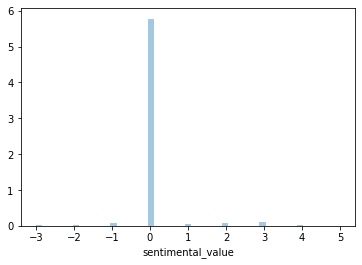

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentimental_value'])

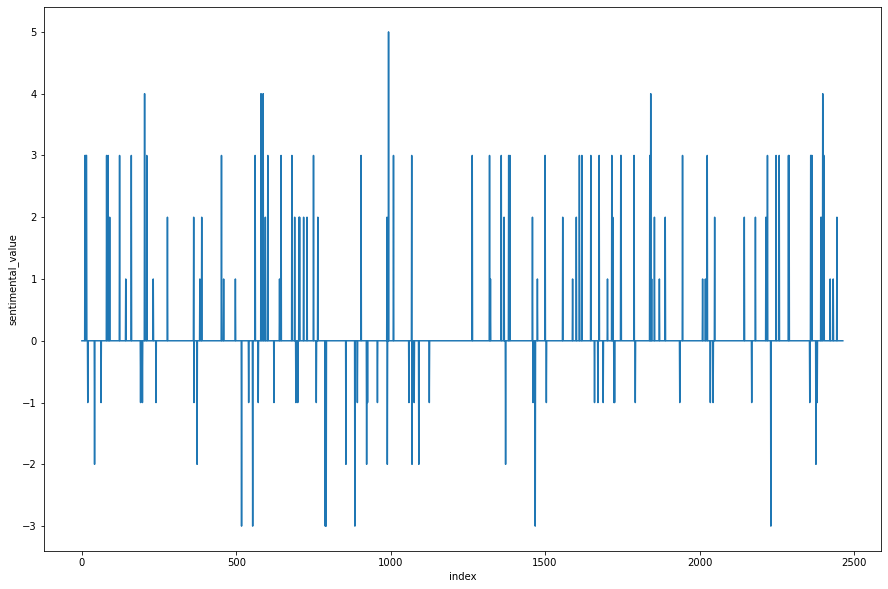

In [86]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentimental_value',x='index',data=sent_df)

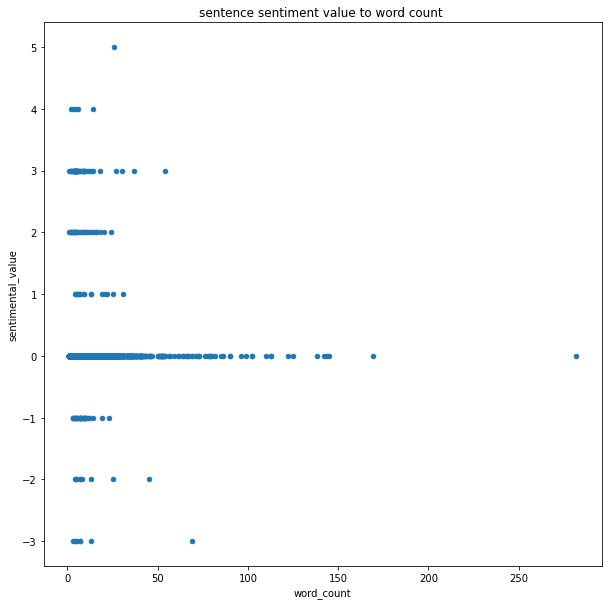

In [87]:
sent_df.plot.scatter(x='word_count',y='sentimental_value',figsize=(10,10),title='sentence sentiment value to word count ')